In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
X = df.drop(columns=['id','Product ID','Machine failure' ])
Y = df[['Machine failure']]

In [7]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [9]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

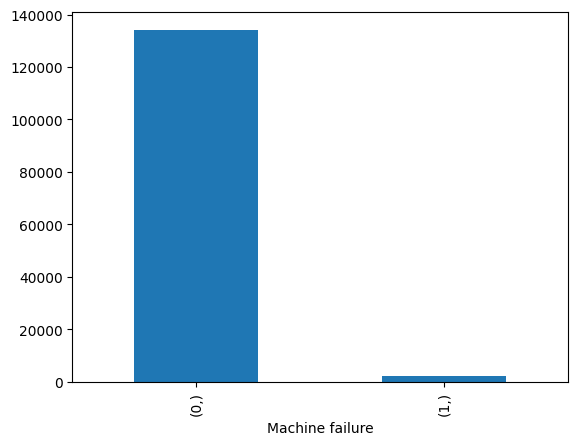

In [10]:
Y.value_counts().plot(kind='bar')

In [11]:
# Seperate categorical and con data
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [55]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [56]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [57]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [59]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,0.0,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [60]:

ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [24]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [66]:
dct = {
    "Logistic" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
 }

In [67]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [68]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [71]:
train_score = []
test_score = []
cv_score = []
for name, model in dct.items():
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Get the f1 macro score for train and test
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")
    # Calculate 5 fold cv score
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
    # Average of scores
    scores_mean = scores.mean()
    # Append in all above values
    train_score.append(f1_train)
    test_score.append(f1_test)
    cv_score.append(scores_mean)
    # Print the results
    print(f"Model Name : {name}\n")
    print(f"Train F1 Macro : {f1_train:.4f}")
    print(f"Test F1 Macro : {f1_test:.4f}")
    print(f"F1 Macro 5 Fold CV : {scores_mean:.4f}")
    print('\n===================================================\n')

Model Name : Logistic

Train F1 Macro : 0.9303
Test F1 Macro : 0.9315
F1 Macro 5 Fold CV : 0.9303


Model Name : Decision Tree

Train F1 Macro : 0.9975
Test F1 Macro : 0.8830
F1 Macro 5 Fold CV : 0.8724


Model Name : Random Forest

Train F1 Macro : 0.9973
Test F1 Macro : 0.9312
F1 Macro 5 Fold CV : 0.9273


Model Name : Gradient Boost

Train F1 Macro : 0.9357
Test F1 Macro : 0.9309
F1 Macro 5 Fold CV : 0.9280




In [73]:
results_df = pd.DataFrame(results)
results_df

,name,train_f1,test_f1,train_cv
0,Logistic,0.931790,0.926034,0.931022
1,Decision Tree,0.997775,0.880140,0.875540
2,Random Forest,0.997632,0.927944,0.928702
3,Gradient Boost,0.935762,0.925459,0.928527
4,XGBoost,0.946663,0.924528,0.928369


In [34]:
results_df.sort_values(by='train_cv', ascending=False)

,name,train_f1,test_f1,train_cv
0,Logistic,0.931790,0.926034,0.931022
2,Random Forest,0.997632,0.927944,0.928702
3,Gradient Boost,0.935762,0.925459,0.928527
4,XGBoost,0.946663,0.924528,0.928369
1,Decision Tree,0.997775,0.880140,0.875540


## From above results Cross Validated F1 Macro is Highest for Logistic Regression - 0.9310

In [75]:
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

LogisticRegression()

In [76]:
best_model.score(xtrain , ytrain)

0.9961884866642845

In [77]:
best_model.score(xtest, ytest)

0.9961518727552591

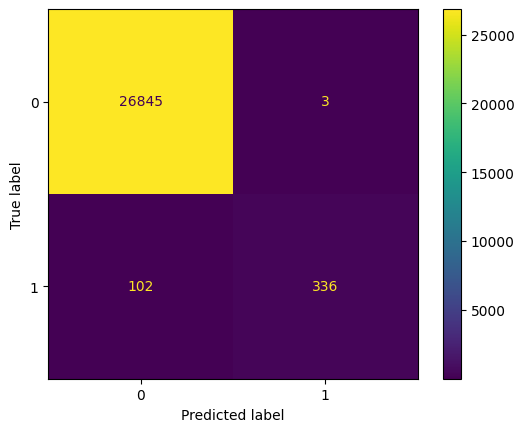

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [79]:
# Predict results for train and test
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [80]:
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [81]:

ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [82]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



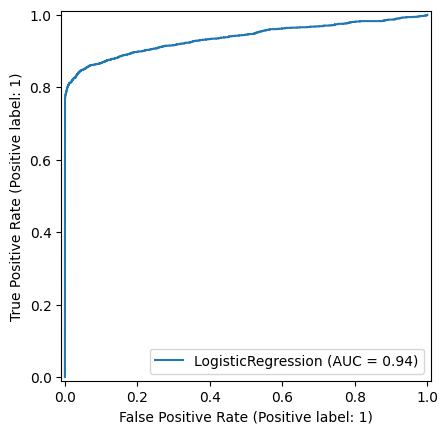

In [83]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

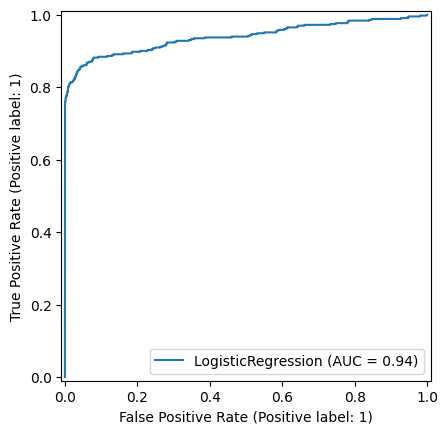

In [45]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [84]:
roc_scores = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring='roc_auc')
roc_scores

array([0.941253  , 0.93107413, 0.95421902, 0.9278796 , 0.92415604])

In [85]:
roc_scores.mean()

np.float64(0.935716357155114)

In [86]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [87]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [88]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [89]:
preds = best_model.predict(xnew_pre)
probs = best_model.predict_proba(xnew_pre)

In [90]:
preds[0:5]

array([0, 0, 0, 0, 0])

In [91]:
model.classes_

array([0, 1])

In [92]:
probs[0:5]

array([[0.99789846, 0.00210154],
       [0.99896056, 0.00103944],
       [0.99743669, 0.00256331],
       [0.99722745, 0.00277255],
       [0.99657384, 0.00342616]])

In [93]:

prob_failure = probs[:, 1]
prob_failure[0:5]

array([0.00210154, 0.00103944, 0.00256331, 0.00277255, 0.00342616])

## Save above results in dataframe

In [94]:

df_final = xnew[['id']]
df_final['Macine_Failure_pred'] = preds 
df_final['Probability'] = prob_failure

In [95]:
df_final

,id,Macine_Failure_pred,Probability
0,136429,0,0.002102
1,136430,0,0.001039
2,136431,0,0.002563
3,136432,0,0.002773
4,136433,0,0.003426
...,...,...,...
90949,227378,0,0.002211
90950,227379,0,0.000497
90951,227380,0,0.002975
90952,227381,0,0.002303


In [96]:

df_final['Macine_Failure_pred'].value_counts()

Macine_Failure_pred
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='Macine_Failure_pred'>

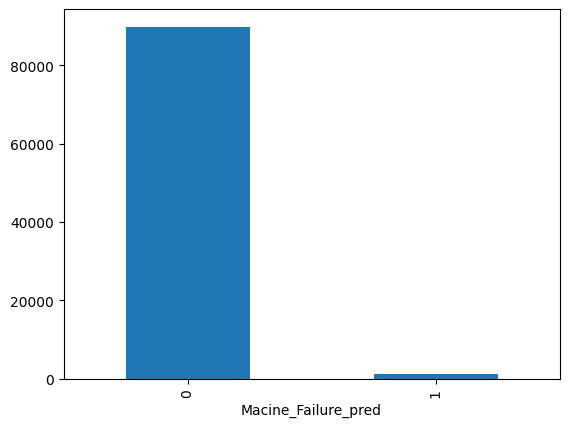

In [97]:
df_final['Macine_Failure_pred'].value_counts().plot(kind='bar')

In [98]:

df_final.query("`Macine_Failure_pred`==1")

,id,Macine_Failure_pred,Probability
17,136446,1,0.992574
209,136638,1,0.996292
223,136652,1,0.987550
397,136826,1,0.996967
405,136834,1,0.998944
...,...,...,...
90503,226932,1,0.989414
90665,227094,1,0.999825
90679,227108,1,0.742960
90784,227213,1,0.983857


In [99]:

df_final.to_csv("Results.csv", index=False)